In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../../../Data/iris_update.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


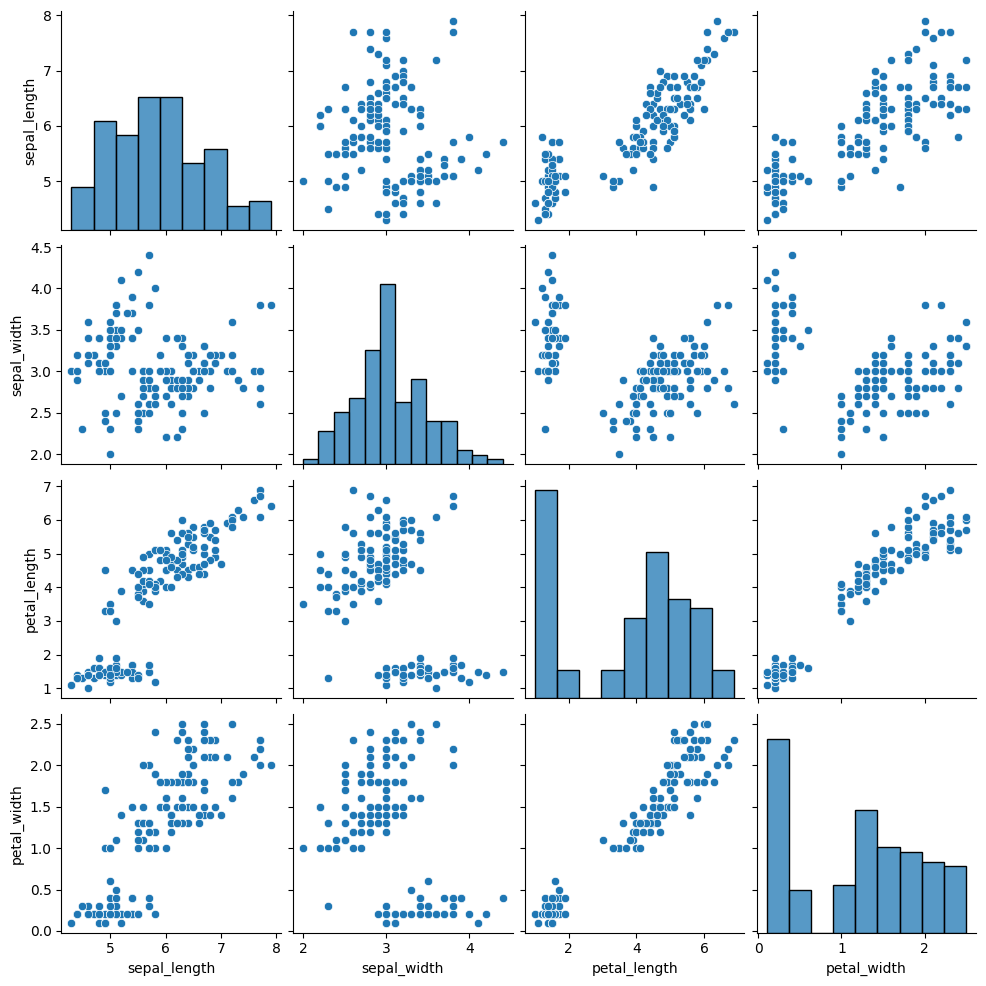

In [3]:
sns.pairplot(data=df)
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss=[]

for i in range(2,20):
    km=KMeans(n_clusters=i,init="k-means++")    
    km.fit(df)
    wcss.append(km.inertia_)  ### value of  wcss

In [6]:
kmn=KMeans(n_clusters=3)
df["predict"]=kmn.fit_predict(df)
df

,sepal_length,sepal_width,petal_length,petal_width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


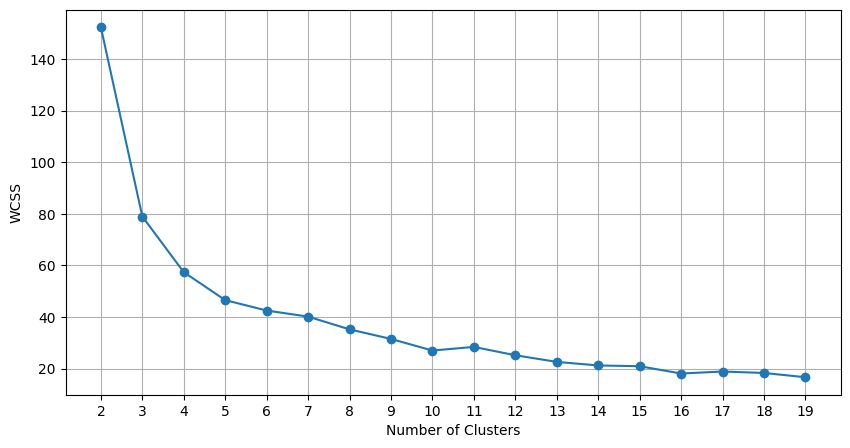

In [7]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,20)],wcss,marker="o")
plt.xlabel("Number of Clusters")
plt.xticks([i for i in range(2,20)])
plt.ylabel("WCSS")
# plt.grid(axis="x")
plt.grid()
plt.show()

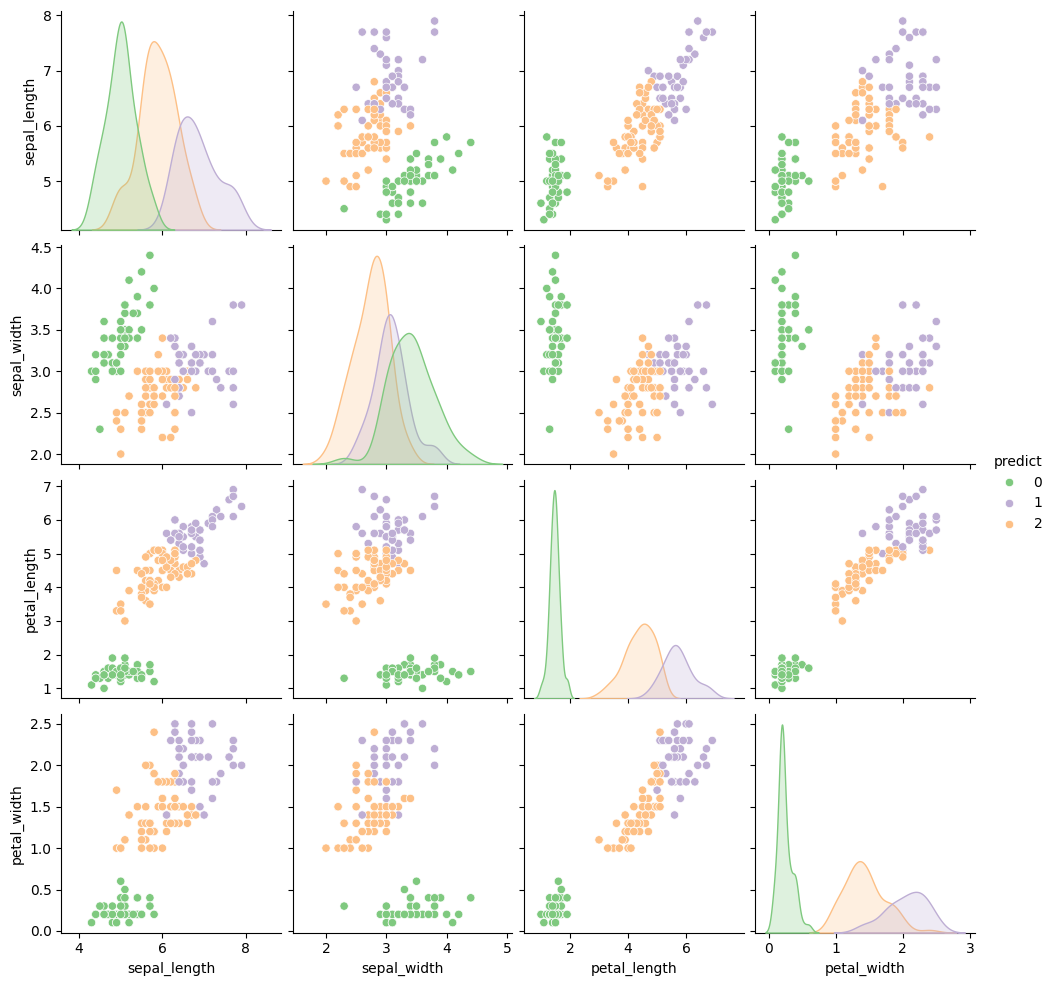

In [8]:
sns.pairplot(data=df,hue="predict",palette="Accent")
# plt.savefig("predict_iris.jpg")
plt.show()

### Check from orignal datasets

In [9]:
org_df=pd.read_csv("../../../Data/iris.csv")
org_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


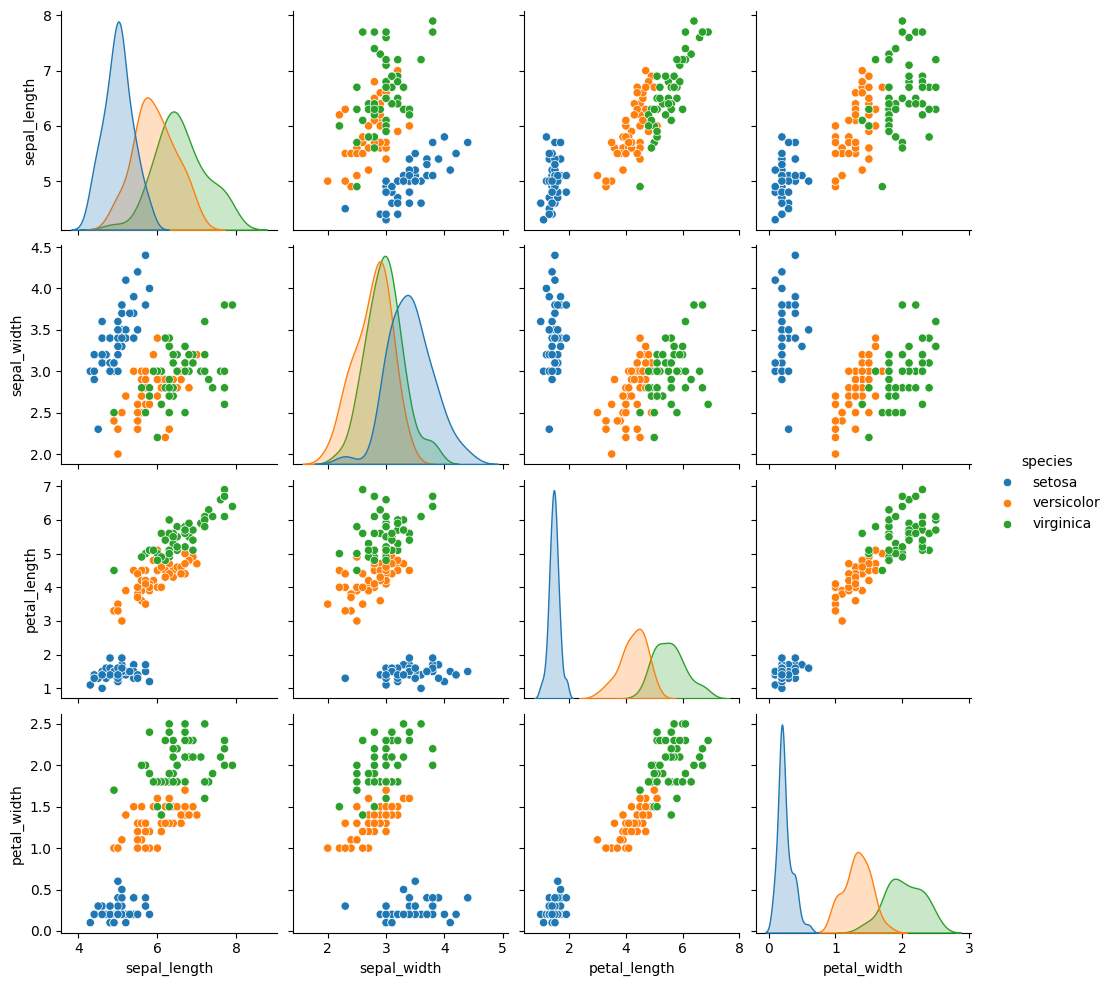

In [10]:
sns.pairplot(data=org_df,hue="species")
# plt.savefig("orginal_iris.jpg")
plt.show()

## Silhouette_score

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
kmn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [13]:
silhouette_score(df,labels=kmn.labels_)

np.float64(0.6218780254335335)

In [14]:
ss=[]
no_c=[j for j in range(2,20)]
for i in range(2,20):
    kn1=KMeans(n_clusters=i)
    kn1.fit(df)
    ss.append(silhouette_score(df,kn1.labels_))

In [15]:
ss

[np.float64(0.7009696962865875),
 np.float64(0.6218780254335335),
 np.float64(0.5419119676925791),
 np.float64(0.5382302595918196),
 np.float64(0.5004761319902147),
 np.float64(0.3910587223787276),
 np.float64(0.3501077375826545),
 np.float64(0.33179333990929033),
 np.float64(0.3273685250368311),
 np.float64(0.32500033757164837),
 np.float64(0.28947207811549297),
 np.float64(0.2764406432743546),
 np.float64(0.2744552799925546),
 np.float64(0.29603448687790795),
 np.float64(0.2970349125840111),
 np.float64(0.284130515353201),
 np.float64(0.2786901967216456),
 np.float64(0.2872984492883508)]

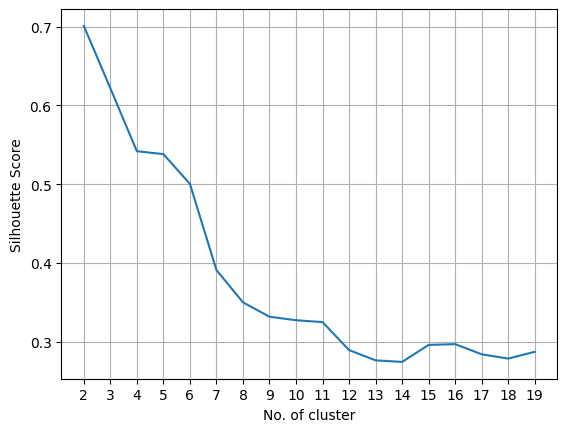

In [16]:
plt.plot(no_c,ss)
plt.xlabel("No. of cluster")
plt.ylabel("Silhouette Score")
plt.xticks(no_c)
plt.grid()
plt.show()

### Hence it gives that the highest score is 3 so there should be 3 cluster